# Imports

In [40]:
import pandas as pd

# Reading CSV

In [41]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Spam Analysis\Edited Dataset.csv', encoding='latin1')


# Viewing Data

In [42]:
print(df)

     labels                                               text  \
0       ham  Go until jurong point, crazy.. Available only ...   
1       ham                      Ok lar... Joking wif u oni...   
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3       ham  U dun say so early hor... U c already then say...   
4       ham  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567   spam  This is the 2nd time we have tried 2 contact u...   
5568    ham               Will ü b going to esplanade fr home?   
5569    ham  Pity, * was in mood for that. So...any other s...   
5570    ham  The guy did some bitching but I acted like i'd...   
5571    ham                         Rofl. Its true to its name   

                                                text_fr  \
0     Allez jusqu'à Jurong point, fou.. Disponible s...   
1              J'ai fait une blague sur le wif u oni...   
2     Entrée libre dans 2 a wk

# Number of Spam Messages

In [43]:
spam_count = df[df['labels'] == 'spam'].shape[0]
print("Number of Spam Messages:", spam_count)

Number of Spam Messages: 747


# Number of Ham Messages

In [44]:
ham_count = df[df['labels'] == 'ham'].shape[0]
print("Number of Ham Messages:", ham_count)

Number of Ham Messages: 4825


# Checks for null Values

In [45]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Display the total number of missing values
total_missing = df.isnull().sum().sum()
print(f"Total number of missing values: {total_missing}")


Columns with missing values:
Series([], dtype: int64)
Total number of missing values: 0


# Imports

In [46]:
import nltk
from nltk.corpus import stopwords
import string
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The 'text' column exists to Avoid Errors, Debugging and Maintenance, Input Validation, Handling Missing Data  

In [47]:
# Ensure 'text' column exists
if 'text' not in df.columns:
    print("The DataFrame does not have a 'text' column.")

Handling missing values is a critical step in data preprocessing, especially when dealing with text data. Missing values can cause errors in processing steps

In [48]:
# Handle missing values by filling them with empty strings
df['text'] = df['text'].fillna('')

In [49]:
# Handle missing values in text_fr by filling them with empty strings
df['text_fr'] = df['text_fr'].fillna('')

Converting all entries in the 'text' column to strings is essential to ensure that the preprocessing functions, such as lowercasing and tokenization, can be applied without errors.

In [50]:
# Convert all entries in the 'text' column to strings
df['text'] = df['text'].astype(str)

In [51]:
# Convert all entries in the 'text_fr' column to strings
df['text_fr'] = df['text_fr'].astype(str)

# pre_processing the text

Function to preprocess text involves incorporating various text processing steps such as lowercasing, removing stopwords, and removing punctuation

In [52]:
from nltk.corpus import stopwords
import string

def preprocess_text(text):
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in filtered_tokens]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

In [53]:
# Apply preprocess_text function to the text column
df['text'] = df['text'].apply(preprocess_text)

In [54]:
# Display the DataFrame to verify the changes
print(df.head())

  labels                                               text  \
0    ham  go jurong point crazy available bugis n great ...   
1    ham                            ok lar joking wif u oni   
2   spam  free entry 2 wkly comp win fa cup final tkts 2...   
3    ham                u dun say early hor u c already say   
4    ham             nah think goes usf lives around though   

                                             text_fr  \
0  Allez jusqu'à Jurong point, fou.. Disponible s...   
1           J'ai fait une blague sur le wif u oni...   
2  Entrée libre dans 2 a wkly comp pour gagner FA...   
3     U dun dit si tôt hor... U c déjà dire alors...   
4  Non, je ne pense pas qu'il va à usf, il vit da...   

                                             text_ar  Text length in eng  
0  ???? ??? ???? ??????? ?? ????.. ????? ??? ?? b...                 111  
1                        ??? ???... ???? ??? ????...                  29  
2  ???? ????? ?? ???????? ????????? ????? ?????? ...       

# pre_processing the text_fr

In [55]:
def preprocess_text(text_fr):
    # Check if text_fr is NaN
    if isinstance(text_fr, float) and pd.isna(text_fr):
        return text_fr
    
    # Convert text to lowercase
    text_fr = text_fr.lower()
    # Tokenize the text
    tokens = text_fr.split()
    # Remove punctuation
    filtered_tokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in tokens]
    # Join the filtered tokens back into a string
    cleaned_text_fr = ' '.join(filtered_tokens)
    return cleaned_text_fr

In [56]:
df['text_fr'] = df['text_fr'].apply(preprocess_text)

In [57]:
print(df)

     labels                                               text  \
0       ham  go jurong point crazy available bugis n great ...   
1       ham                            ok lar joking wif u oni   
2      spam  free entry 2 wkly comp win fa cup final tkts 2...   
3       ham                u dun say early hor u c already say   
4       ham             nah think goes usf lives around though   
...     ...                                                ...   
5567   spam  2nd time tried 2 contact u u £750 pound prize ...   
5568    ham                        ü b going esplanade fr home   
5569    ham                  pity  mood that soany suggestions   
5570    ham  guy bitching acted like interested buying some...   
5571    ham                                     rofl true name   

                                                text_fr  \
0     allez jusquà jurong point fou disponible seule...   
1                  jai fait une blague sur le wif u oni   
2     entrée libre dans 2 a wk

# Removing Numbers

In [58]:
# Replace numbers with a placeholder tag
df['text'] = df['text'].str.replace(r'\d+', '<NUM>', regex=True)

# Display the DataFrame to verify the changes
print(df[['text']])


                                                   text
0     go jurong point crazy available bugis n great ...
1                               ok lar joking wif u oni
2     free entry <NUM> wkly comp win fa cup final tk...
3                   u dun say early hor u c already say
4                nah think goes usf lives around though
...                                                 ...
5567  <NUM>nd time tried <NUM> contact u u £<NUM> po...
5568                        ü b going esplanade fr home
5569                  pity  mood that soany suggestions
5570  guy bitching acted like interested buying some...
5571                                     rofl true name

[5572 rows x 1 columns]


In [59]:
# Replace numbers with a placeholder tag
df['text_fr'] = df['text_fr'].str.replace(r'\d+', '<NUM>', regex=True)

# Display the DataFrame to verify the changes
print(df[['text_fr']])


                                                text_fr
0     allez jusquà jurong point fou disponible seule...
1                  jai fait une blague sur le wif u oni
2     entrée libre dans <NUM> a wkly comp pour gagne...
3              u dun dit si tôt hor u c déjà dire alors
4     non je ne pense pas quil va à usf il vit dans ...
...                                                 ...
5567  cest la <NUM>ème fois que nous avons essayé <N...
5568           estce que ü b ira à lesplanade en maison
5569  dommage  était dhumeur pour ça donc dautres su...
5570  le type a fait une saloperie mais jai agi comm...
5571                           rofl cest vrai à son nom

[5572 rows x 1 columns]


# Removing Extra Whitespace

In [60]:
df= df.applymap(lambda x: x.strip() if isinstance(x,str) else x)
print(df)

     labels                                               text  \
0       ham  go jurong point crazy available bugis n great ...   
1       ham                            ok lar joking wif u oni   
2      spam  free entry <NUM> wkly comp win fa cup final tk...   
3       ham                u dun say early hor u c already say   
4       ham             nah think goes usf lives around though   
...     ...                                                ...   
5567   spam  <NUM>nd time tried <NUM> contact u u £<NUM> po...   
5568    ham                        ü b going esplanade fr home   
5569    ham                  pity  mood that soany suggestions   
5570    ham  guy bitching acted like interested buying some...   
5571    ham                                     rofl true name   

                                                text_fr  \
0     allez jusquà jurong point fou disponible seule...   
1                  jai fait une blague sur le wif u oni   
2     entrée libre dans <NUM> 

C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\476542246.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df= df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


# CSV File

In [61]:
output_file_path = 'preprocessed_data_output.csv'
df.to_csv('preprocessed_data.csv', index=False)
print(f"preprocessed_data saved to {output_file_path}.")

preprocessed_data saved to preprocessed_data_output.csv.


# World Cloud

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WORLD CLOUD FOR HAM MESSAGE IN text

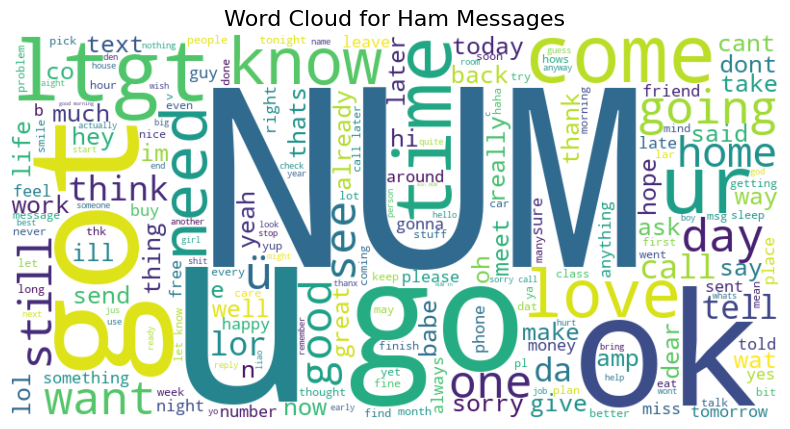

In [63]:
# Filter ham messages
ham_text = ' '.join(df[df['labels'] == 'ham']['text'])

# Generate word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word cloud for ham messages
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16)
plt.axis('off')
plt.show()



# WORLD CLOUD FOR HAM MESSAGE IN text_fr

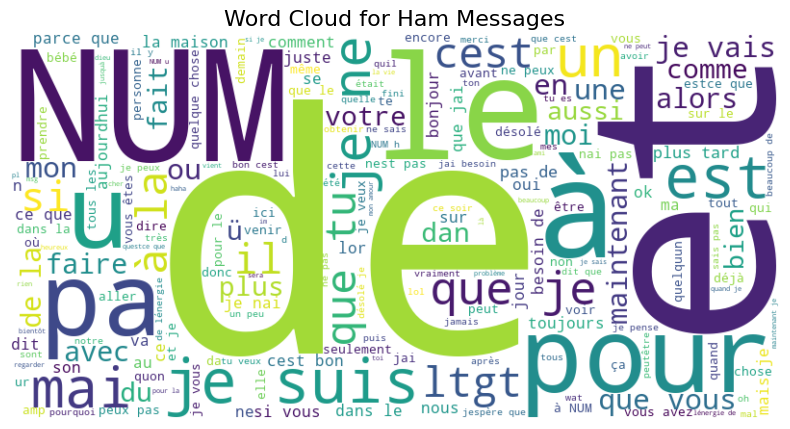

In [64]:
# Filter ham messages
ham_text = ' '.join(df[df['labels'] == 'ham']['text_fr'])

# Generate word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word cloud for ham messages
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16)
plt.axis('off')
plt.show()

# WORLD CLOUD FOR SPAM MESSAGE IN text

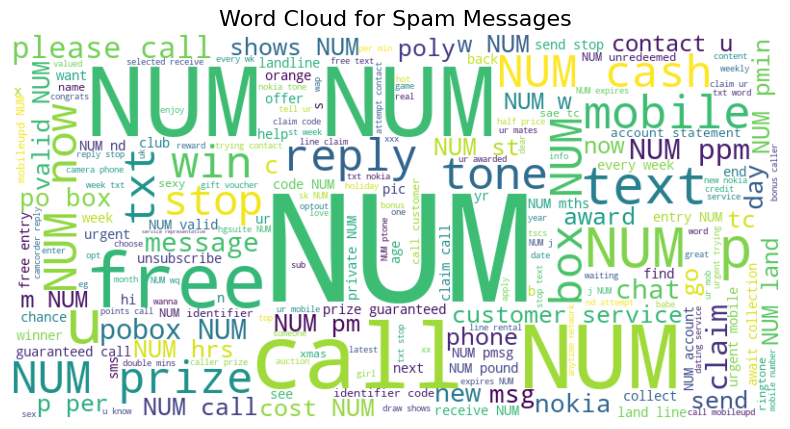

In [65]:
# Filter spam messages
spam_text = ' '.join(df[df['labels'] == 'spam']['text'])

# Generate word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud for spam messages
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16)
plt.axis('off')
plt.show()

# WORLD CLOUD FOR SPAM MESSAGE IN text_fr

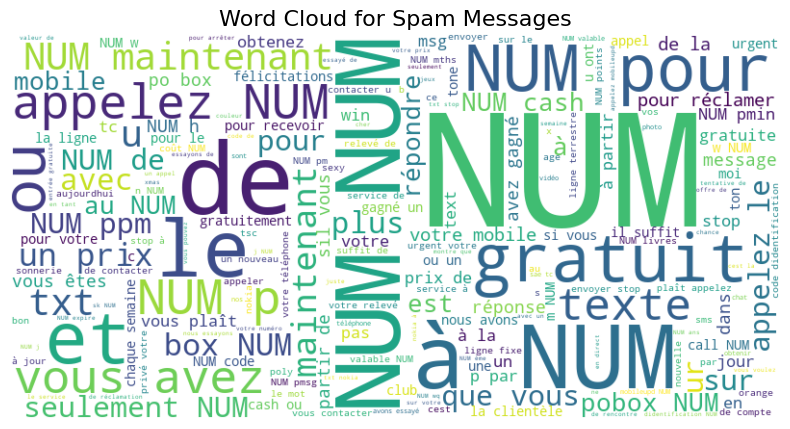

In [66]:
# Filter spam messages
spam_text = ' '.join(df[df['labels'] == 'spam']['text_fr'])

# Generate word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the word cloud for spam messages
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16)
plt.axis('off')
plt.show()

# WORLD CLOUD FOR THE combined_text

In [67]:
# Combine all text data into a single string
combined_text = ' '.join(df['text'])

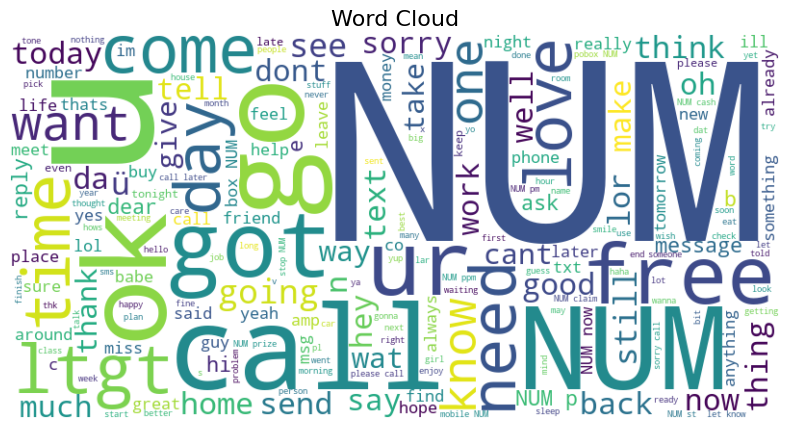

In [68]:
# Generate a word cloud directly from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

# WORLD CLOUD FOR THE combined_text_fr

In [69]:
# Combine all text_fr data into a single string
combined_text_fr = ' '.join(df['text_fr'])

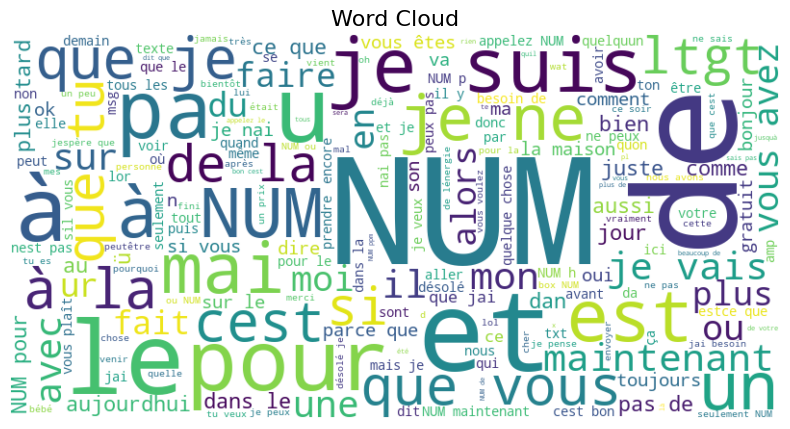

In [70]:
# Generate a word cloud directly from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text_fr)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

# Machine Learning Models

Machine learning is like giving brains to computers. Instead of telling them exactly what to do, we let them learn from their experiences. They get better at tasks by learning from data.

Machine learning comes in three flavors: supervised learning, unsupervised learning, and reinforcement learning. It’s like teaching a kid with clear instructions, leaving them to explore on their own, or guiding them through rewards and punishments.


# Imports

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Spam Analysis\preprocessed_data.csv', encoding='latin1')

# Handle missing values by filling them with an empty string or any other strategy
df['text'].fillna('', inplace=True)
df['labels'].fillna('ham', inplace=True)  # Assuming 'ham' is the default category

# Extract features and labels
X = df['text']  # assuming column B is labeled 'text'
y = df['labels']  # assuming column A is labeled 'labels'

# Ensure there are no NaN values
X = X.fillna('')
y = y.fillna('ham')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model

Logistic regression is a handy tool for picking between two choices.

In [73]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model
Accuracy: 0.9650224215246637
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.91      0.82      0.86       149

    accuracy                           0.97      1115
   macro avg       0.94      0.90      0.92      1115
weighted avg       0.96      0.97      0.96      1115

[[954  12]
 [ 27 122]]


# Decision Tree Model

A decision tree is a tree-like structure that represents a series of decisions and their possible consequences. It is used in machine learning for classification and regression tasks.


In [74]:
# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train_tfidf, y_train)
y_pred_tree = tree.predict(X_test_tfidf)
print("\nDecision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Model
Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.91      0.88      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[953  13]
 [ 18 131]]


# Support Vector Machine Model (SVM)

Support Vector Machine (SVM) is a supervised learning algorithm that can be used for both classification and regression tasks, though it is most commonly used for classification.



In [75]:
# Support Vector Machine Model
svm = SVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("\nSupport Vector Machine Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine Model
Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.95      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.96      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[959   7]
 [ 20 129]]


# Machine Learning for the text_fr

In [77]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Spam Analysis\preprocessed_data.csv', encoding='latin1')

# Handle missing values by filling them with an empty string or any other strategy
df['text_fr'].fillna('', inplace=True)
df['labels'].fillna('ham', inplace=True)  # Assuming 'ham' is the default category

# Extract features and labels
X = df['text_fr']  # assuming column B is labeled 'text'
y = df['labels']  # assuming column A is labeled 'labels'

# Ensure there are no NaN values
X = X.fillna('')
y = y.fillna('ham')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model

In [78]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model
Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.95      0.84      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[959   7]
 [ 24 125]]


# Decision Tree Model

In [79]:
# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train_tfidf, y_train)
y_pred_tree = tree.predict(X_test_tfidf)
print("\nDecision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Model
Accuracy: 0.9632286995515695
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       966
        spam       0.86      0.86      0.86       149

    accuracy                           0.96      1115
   macro avg       0.92      0.92      0.92      1115
weighted avg       0.96      0.96      0.96      1115

[[946  20]
 [ 21 128]]


# Support Vector Machine Model

In [80]:
# Support Vector Machine Model
svm = SVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("\nSupport Vector Machine Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine Model
Accuracy: 0.9820627802690582
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.97      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[962   4]
 [ 16 133]]


# Deep Learning Model

In the field of deep learning, convolutional neural network (CNN) is among the class of deep neural networks, which was being mostly deployed in the field of analyzing/image recognition.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [82]:
# Example loading data
data = pd.read_csv(r"C:\Users\Admin\Desktop\Spam Analysis\Edited Dataset.csv", encoding='latin1')
texts = data['text'].values
labels = data['labels'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
maxlen = 100  # You can adjust the maxlen
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import numpy as np

# Define model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [85]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support


# Assuming y_pred is already in the correct format (integers)
y_pred = np.array([0, 1, 0, 1])  # Example predicted labels

# Example true labels in string format
y_true_str = ['ham', 'spam', 'ham', 'spam']  

# Define the label encoding dictionary
label_encoding = {'ham': 0, 'spam': 1}

# Convert true labels to integers using the label encoding
y_true = np.array([label_encoding[label] for label in y_true_str])

# Now both y_true and y_pred are in the same format (integers)
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Support: {support}")


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Support: None
